In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

def e1(n, W, v, w, k):
    return n*W - np.sqrt(v*v + w*w + 2*v*w*np.cos(k))

def e2(n, W, v, w, k):
    return n*W + np.sqrt(v*v + w*w + 2*v*w*np.cos(k))
    
def e1v(n, W, v, w, kv):
    return [e1(n, W, v, w, i) for i in kv]
def e2v(n, W, v, w, kv):
    return [e2(n, W, v, w, i) for i in kv]

In [119]:
W = 0.3
V = 0.1
g0 = 1
delta = 00
t = 0.5
d = 1

v = g0 + delta - V*np.cos(W*t)
w = g0 - delta + V*np.cos(W*t)
kv = np.arange(-d*np.pi, d*np.pi, 0.1)

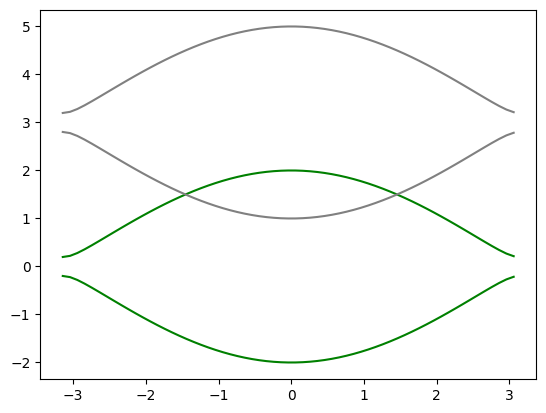

In [120]:
n=0
plt.plot(kv, e1v(n, W, v, w, kv), color='green')
plt.plot(kv, e2v(n, W, v, w, kv), color='green')
n=10
plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
plt.plot(kv, e2v(n, W, v, w, kv), color='grey')

# n=-10
# plt.plot(kv, e1v(n, W, v, w, kv), color='grey')
# plt.plot(kv, e2v(n, W, v, w, kv), color='grey')
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la
import scipy.integrate as integrate

In [2]:
def H2x2(v, w, k):
    return np.array([[0, v + w*np.exp(1j*k)],[v + w*np.exp(-1j*k), 0]])
def Hnm(n, m, v, w, k, V, W):
    hnm = np.zeros((2,2), dtype=complex)
    T = 2*np.pi/W
    hnm[0,1] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    hnm[1,0] = (1/T)*(integrate.quad(lambda t: np.real(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(1j*(m-n)*W*t)), 0, 2*np.pi/W)[0] + 1j*integrate.quad(lambda t: np.imag(((v - V*np.cos(W*t)) + (w + V*np.cos(W*t))*np.exp(-1j*k))*np.exp(-1j*(m-n)*W*t)), 0, 2*np.pi/W)[0])
    return hnm

In [4]:
def Hf(lat, v, w, k, V, W):
    blocks = []
    for i in range(1, lat+1):
        row = []
        for j in range(1, lat+1):
            matij = Hnm(i, j, v, w, k, V, W)
            if (i==j):
                matij = matij - 2*i*W*np.eye(2,dtype=complex)
            row.append(matij)
        blocks.append(row)
    m = np.block(blocks)
    # for i in range(m.shape[0]):
    #     m[i,i] = m[i,i] - i*W
    return m

In [125]:
v = 1
w = 1.5
V = 1
W = 1
dk = 0.01

kv = np.arange(-np.pi, np.pi+dk , dk)
latsize = 3
bands = [ [] for i in range(2*latsize) ]
for i in kv:
    eigs = np.sort(la.eigvals(Hf(latsize, v, w, i, V, W)))
    for j in range(2*latsize):
        bands[j].append(np.real(eigs[j]))

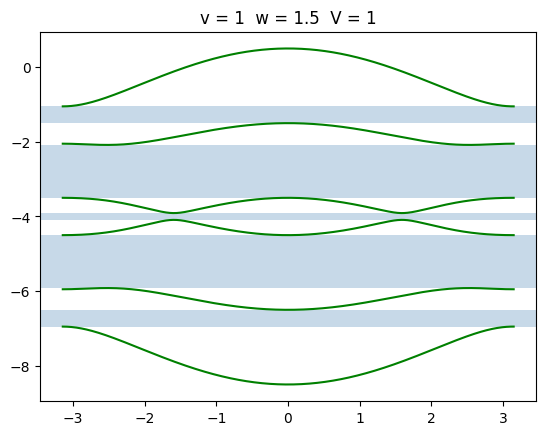

In [127]:
fig, ax = plt.subplots(1,1)
for i in range(2*latsize):
    ax.plot(kv, bands[i], 'green')
    # ax.fill_between(kv, bands[i], facecolor ='orange', alpha=0.1)
    # ax.fill_between(kv, 1, where=bands[i] == 0, facecolor1='green', alpha=.5)
a = 0.3
c = 'steelblue'
ax.axhspan(gaps[0,0],gaps[0,1], 0, 1,facecolor =c, alpha = a)
ax.axhspan(gaps[0,2],gaps[0,3], 0, 1,facecolor =c, alpha = a)
ax.axhspan(gaps[0,4],gaps[0,5], 0, 1,facecolor =c, alpha = a)
ax.axhspan(gaps[0,6],gaps[0,7], 0, 1,facecolor =c, alpha = a)
ax.axhspan(gaps[0,8],gaps[0,9], 0, 1,facecolor =c, alpha = a)

tit = 'v = ' + str(v) + '  w = ' + str(w) + '  V = ' +str(V)
plt.title(tit)
# plt.savefig('quasiBandstucture/'+tit+'.png')
plt.show()

In [114]:
gaps[0,1]

np.float64(-6.4999995410061375)

In [126]:
gaps = []
for i in range(len(bands)):
    if (i==0):
        if (np.max(bands[i]) < np.min(bands[i+1])):
            gaps.append([np.max(bands[i]), np.min(bands[i+1])])
    elif(i==len(bands)-1):
        if (np.min(bands[i]) < np.max(bands[i-1])):
            gaps.append([np.max(bands[i-1]), np.min(bands[i])])
    else:
        if (np.max(bands[i]) < np.min(bands[i+1])):
            gaps.append([np.max(bands[i]), np.min(bands[i+1])])
        if (np.min(bands[i]) < np.max(bands[i-1])):
            gaps.append([np.max(bands[i-1]), np.min(bands[i])])
gaps = np.array(gaps)
gaps = gaps.reshape((1,10))

In [99]:
gaps.shape

(5, 2)

In [123]:
gaps = gaps.reshape((1,10))

In [80]:
np.max(bands[0])

np.float64(-6.499999999999996)

In [79]:
gaps

array([[-6.5       , -6.49999924],
       [-5.00044754, -4.99955246],
       [-4.00021154, -3.99978846],
       [-3.00044754, -2.99955246],
       [-1.50000076, -1.5       ]])

In [72]:
gaps[0]

array([-6.5       , -6.49999924, -5.00044754, -4.99955246, -4.00021154,
       -3.99978846, -3.00044754, -2.99955246, -1.50000076, -1.5       ])